## Exploratory Data Analysis on Food and Nutrient Database for Dietary Studies

### The data set is taken from Food and Nutrient Databases for Dietry Studies
https://www.ars.usda.gov/northeast-area/beltsville-md-bhnrc/beltsville-human-nutrition-research-center/food-surveys-research-group/docs/fndds-download-databases/ 

Database : Nutrient Values for year 2017-2018

FNDDS is a database that provides the nutrient values for foods and beverages reported in What We Eat in America, the dietary intake component of the National Health and Nutrition Examination Survey. Because FNDDS is used to generate the nutrient intake data files for What We Eat in America, NHANES, it is not required to estimate nutrient intakes from the survey. FNDDS is made available for researchers to review the nutrient profiles for specific foods and beverages as well as their associated portions and recipes. Such detailed information makes it possible for researchers to conduct enhanced analysis of dietary intakes. **One example might be, looking across all breakfast cereals, what are the nutrient attributes of those most frequently consumed?**

The Dataset contains total 69 features. Some of them are described below. 
<br>
1. Food Code - An 8-digit number – food code – uniquely identifies each food or beverage item in FNDDS. Food code numbers are generally assigned according to a classification scheme that associates the first digit with one of nine major food commodity groups: Milk and Milk Products; Meat, Poultry, Fish, and Mixtures; Eggs; Dry Beans, Peas, Other Legumes, Nuts, and Seeds; Grain Products; Fruits; Vegetables; Fat, Oils, and Salad Dressings; Sugars, Sweets, Beverages

2. Main Food Description-The main food description is the primary complete description identified by a unique 8-digit food code and may include form, preparation method, and source of item. 

3. WWEIA Category Description - What we eat in America? food description

Other features associated with the nurtients values like Energy (kcal), Carbohydrates, Protein, Fats, Fibers, Water Content, Vitamin B, Vitamin C etc. 

As we will move along the analysis, below are a few example of a few question I will be covering:
1. Average Macro Nutrients in a Food Category.
2. Average Micro Nutrients in a Food Category.
3. What are the factors affecting total energy?


Let's start our analysis

In [170]:
#importing libraries
import pandas as pd
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
import warnings
warnings.filterwarnings("ignore")

In [171]:
#checking the pandas version:
print(pd.__version__)

1.2.4


In [172]:
#loading the csv file:
df = pd.read_csv('C:\\Users\\Anuja\\Data601\\Data601\\midterm\\FNDDS Nutrient Values.csv')
df.head(2)

,FNDDS Nutrient Values\n2017-2018 Food and Nutrient Database for Dietary Studies - At A Glance,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68
0,Food code,Main food description,WWEIA Category number,WWEIA Category description,Energy (kcal),Protein (g),Carbohydrate (g),"Sugars, total\n(g)","Fiber, total dietary (g)",Total Fat (g),...,20:1\n(g),22:1\n(g),18:2\n(g),18:3\n(g),18:4\n(g),20:4\n(g),20:5 n-3\n(g),22:5 n-3\n(g),22:6 n-3\n(g),Water\n(g)
1,11000000,"Milk, human",9602,Human milk,70,1.03,6.89,6.89,0,4.38,...,0.04,0,0.374,0.052,0,0.026,0,0,0,87.5


Looking at the header and dataframe, the first row contains the column names. Let's rearrange to give the dataframe proper header

In [173]:
#taking the first row of the dataframe which is at index 0
new_header = df.iloc[0]
#taking the dataframe from the second row which is from index 1 to last
df = df[1:]
#assigning the first row of the data frame to the columns of the dataframe
df.columns = new_header
df.head(2)

,Food code,Main food description,WWEIA Category number,WWEIA Category description,Energy (kcal),Protein (g),Carbohydrate (g),"Sugars, total\n(g)","Fiber, total dietary (g)",Total Fat (g),...,20:1\n(g),22:1\n(g),18:2\n(g),18:3\n(g),18:4\n(g),20:4\n(g),20:5 n-3\n(g),22:5 n-3\n(g),22:6 n-3\n(g),Water\n(g)
1,11000000,"Milk, human",9602,Human milk,70,1.03,6.89,6.89,0,4.38,...,0.04,0,0.374,0.052,0,0.026,0,0,0,87.5
2,11100000,"Milk, NFS",1004,"Milk, reduced fat",51,3.34,4.87,4.89,0,1.99,...,0.002,0,0.069,0.007,0,0.003,0,0.001,0,89.04


In [13]:
#checking the shape of the dataframe
print("Number of rows dataframe contains:", df.shape[0])
print("Number of columns dataframe contains:", df.shape[1])

print("\nDifferent type of values dataframe holds:")
df.dtypes.value_counts()

Number of rows dataframe contains: 7083
Number of columns dataframe contains: 69

Different type of values dataframe holds:


object    69
dtype: int64

We can see there are 69 features in the dataframe, let's examine them.

In [14]:
#converting the columns to a list to see all the column names
column_names = df.columns.to_list()
print("List of column names are given below:")
print(column_names)

List of column names are given below:
['Food code', 'Main food description', 'WWEIA Category number', 'WWEIA Category description', 'Energy (kcal)', 'Protein (g)', 'Carbohydrate (g)', 'Sugars, total\n(g)', 'Fiber, total dietary (g)', 'Total Fat (g)', 'Fatty acids, total saturated (g)', 'Fatty acids, total monounsaturated (g)', 'Fatty acids, total polyunsaturated (g)', 'Cholesterol (mg)', 'Retinol (mcg)', 'Vitamin A, RAE (mcg_RAE)', 'Carotene, alpha (mcg)', 'Carotene, beta (mcg)', 'Cryptoxanthin, beta (mcg)', 'Lycopene (mcg)', 'Lutein + zeaxanthin (mcg)', 'Thiamin (mg)', 'Riboflavin (mg)', 'Niacin (mg)', 'Vitamin B-6 (mg)', 'Folic acid (mcg)', 'Folate, food (mcg)', 'Folate, DFE (mcg_DFE)', 'Folate, total (mcg)', 'Choline, total (mg)', 'Vitamin B-12 (mcg)', 'Vitamin B-12, added\n(mcg)', 'Vitamin C (mg)', 'Vitamin D (D2 + D3) (mcg)', 'Vitamin E (alpha-tocopherol) (mg)', 'Vitamin E, added\n(mg)', 'Vitamin K (phylloquinone) (mcg)', 'Calcium (mg)', 'Phosphorus (mg)', 'Magnesium (mg)', 'Iron\

**Checking for duplicates**

In [15]:
df =df.drop_duplicates()
print("Shape of dataframe after dropping the duplicate columns:",df.shape)

Shape of dataframe after dropping the duplicate columns: (7083, 69)


By looking at the column, column from 4:0\n(g) to 22:6 n-3\n(g) are of no use for my analysis. That's why I choose to drop these columns. Let's first clean '\n' from these columns and then I will remove them using their index.

In [16]:
clean_columns = []
for x in column_names:
    clean_columns.append(x.replace("\n", ""))
#print(clean_columns)

#assigning the clean columns to dataframe
df.columns = clean_columns

#### Dropping columns that are not useful for my work

In [17]:
print("Shape of the dataframe before dropping the columns:", df.shape,'\n')
#printing the index of the columns 4:0(g) and 22:6 n-3(g) 
for i,j in enumerate(clean_columns):
    if j == '4:0(g)':
        print("Index of column " +str(j)+ ' is', i)
        
for i,j in enumerate(clean_columns):
    if j == '22:6 n-3(g)':
        print("Index of column " +str(j)+ ' is', i)
        
#We have to drop columns from index 49 to index 68 (exclusive)
#creating a new dataframe contaning the columns to be dropped:
dropping_columns = df.iloc[:, 49:68]

#dropping the columns and storing in a new dataframe
df2 = df.drop(dropping_columns, axis = 1) 
#print(df2.columns)

print("\nShape of the dataframe after dropping the columns:",df2.shape)

Shape of the dataframe before dropping the columns: (7083, 69) 

Index of column 4:0(g) is 49
Index of column 22:6 n-3(g) is 67

Shape of the dataframe after dropping the columns: (7083, 50)


**Changing the type of columns containing numbers which are object in the dataframe**

In [23]:
print("Datatypes of dataframe is",df.dtypes.value_counts())
#only two columns in the dataframe were objects rest everything is numerical
list_numeric_columns = ['Food code','WWEIA Category number','Energy (kcal)', 'Protein (g)', 'Carbohydrate (g)', 
                        'Sugars, total(g)', 'Fiber, total dietary (g)', 'Total Fat (g)', 
                        'Fatty acids, total saturated (g)', 'Fatty acids, total monounsaturated (g)',
                        'Fatty acids, total polyunsaturated (g)', 'Cholesterol (mg)', 'Retinol (mcg)', 
                        'Vitamin A, RAE (mcg_RAE)', 'Carotene, alpha (mcg)', 'Carotene, beta (mcg)', 
                        'Cryptoxanthin, beta (mcg)', 'Lycopene (mcg)', 'Lutein + zeaxanthin (mcg)', 
                        'Thiamin (mg)', 'Riboflavin (mg)', 'Niacin (mg)', 'Vitamin B-6 (mg)', 'Folic acid (mcg)', 
                        'Folate, food (mcg)', 'Folate, DFE (mcg_DFE)', 'Folate, total (mcg)', 'Choline, total (mg)', 
                        'Vitamin B-12 (mcg)', 'Vitamin B-12, added(mcg)', 'Vitamin C (mg)', 'Vitamin D (D2 + D3) (mcg)', 
                        'Vitamin E (alpha-tocopherol) (mg)', 'Vitamin E, added(mg)', 'Vitamin K (phylloquinone) (mcg)', 
                        'Calcium (mg)', 'Phosphorus (mg)', 'Magnesium (mg)', 'Iron(mg)', 'Zinc(mg)', 'Copper (mg)', 
                        'Selenium (mcg)', 'Potassium (mg)', 'Sodium (mg)', 'Caffeine (mg)', 'Theobromine (mg)', 'Alcohol (g)', 'Water(g)']

df2[list_numeric_columns] = df2[list_numeric_columns].apply(pd.to_numeric, errors = 'coerce', axis= 1)
print("\nDatatype count after changing object columns to numeric columns:")
print(df2.dtypes.value_counts())

#changing the "WWEIA Category Description" to a category column
df2['WWEIA Category description'] = df['WWEIA Category description'].astype('category')
print("\nDatatype count after changing object column to category column:")
print(df2.dtypes.value_counts())

Datatypes of dataframe is object    69
dtype: int64

Datatype count after changing object columns to numeric columns:
float64     48
object       1
category     1
dtype: int64

Datatype count after changing object column to category column:
float64     48
object       1
category     1
dtype: int64


**Checking the sum of zeros in the every column**

In [24]:
for col in df2.columns:
    column = df2[col]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    print('Count of zeros in column ', col, ' is : ', count)

Count of zeros in column  Food code  is :  0
Count of zeros in column  Main food description  is :  0
Count of zeros in column  WWEIA Category number  is :  0
Count of zeros in column  WWEIA Category description  is :  0
Count of zeros in column  Energy (kcal)  is :  28
Count of zeros in column  Protein (g)  is :  202
Count of zeros in column  Carbohydrate (g)  is :  430
Count of zeros in column  Sugars, total(g)  is :  663
Count of zeros in column  Fiber, total dietary (g)  is :  1642
Count of zeros in column  Total Fat (g)  is :  228
Count of zeros in column  Fatty acids, total saturated (g)  is :  322
Count of zeros in column  Fatty acids, total monounsaturated (g)  is :  336
Count of zeros in column  Fatty acids, total polyunsaturated (g)  is :  300
Count of zeros in column  Cholesterol (mg)  is :  2443
Count of zeros in column  Retinol (mcg)  is :  2650
Count of zeros in column  Vitamin A, RAE (mcg_RAE)  is :  1411
Count of zeros in column  Carotene, alpha (mcg)  is :  5180
Count 

Columns like, Caffeine, Theobromine ,Alcohol etc contains zero upto 85%.
It does not mean we have to drop them. It hold significane to the data. For instance, if you want to know the alcohol content of a specific food categroy

**Null Values**

In [25]:
empty_columns = []

for col in df2.columns:
    if df2[col].isnull().all():
        empty_columns.append(col)
        
print(" List of empty columns are:")
display(empty_columns)

 List of empty columns are:


[]

There are no empty values in the columns.
Fortunately, in our data there are no missing values.

**Let's examine some of the columns in the dataframe**

Checking the disrtibution of Energy column

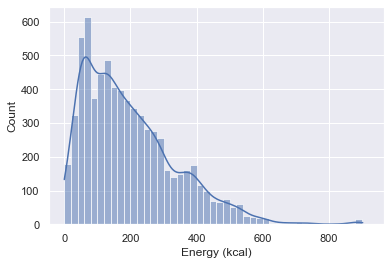

In [30]:
hist_ = sns.histplot(data=df2, x="Energy (kcal)", binwidth=20, kde = True)
sns.set(rc={'figure.figsize':(20,15)})

Let's see the different kind of food category we can catch from the columns:
- "Main Food description"
- "WWEIA Category description" 

In [31]:
from collections import Counter
from wordcloud import WordCloud

def wordclouding(data, label='product_name', sep=' '):
    """To return a wordcloud present in the column 'label', the separation of the word is the argument 'sep' '"""
    words = []
    
    for string in data[label]:
        listwords= str(string).split(sep)
        for w in listwords:
            if (w!=' ')and (w!='nan'):
                words.append(w)
    count=Counter(words)
        

    wordcloud = WordCloud(width=1080, height=920, colormap='PuBuGn').fit_words(count)
    plt.figure(figsize=(25,15))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.margins(x=0, y=0)
    plt.show()

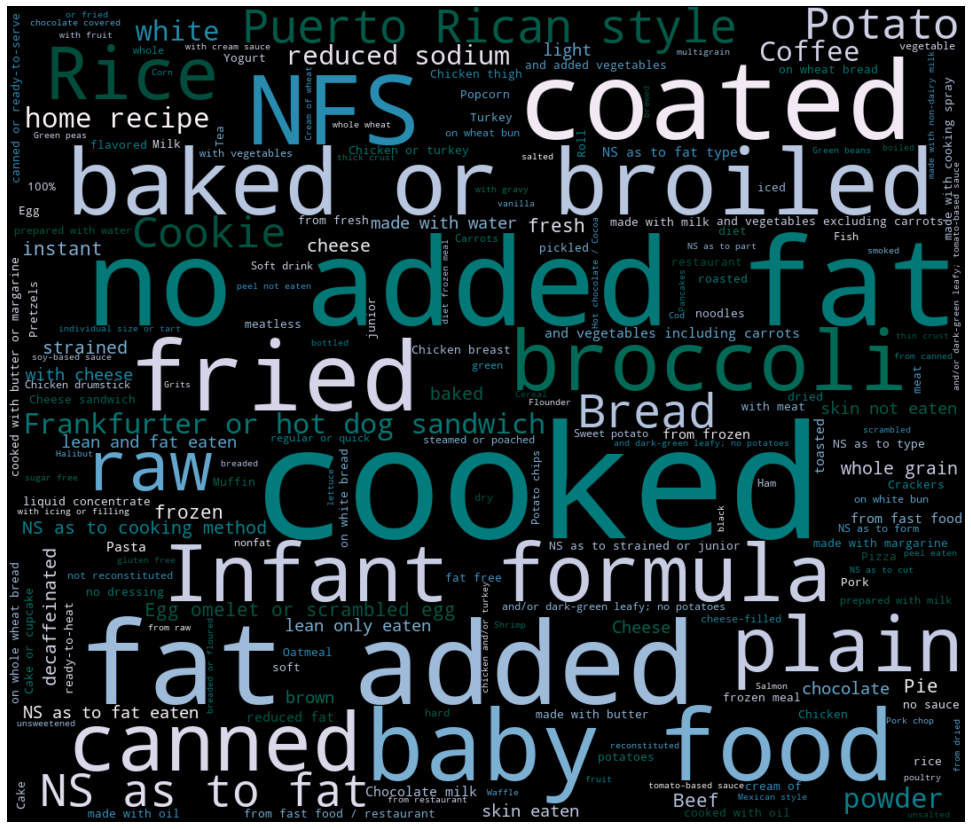

In [32]:
#for the column "Main Food description"
wordclouding(df2, label='Main food description', sep=',')

Does not give much information about the categories of food in the dataset. Trying column WWEIA Category description to explore the different names.

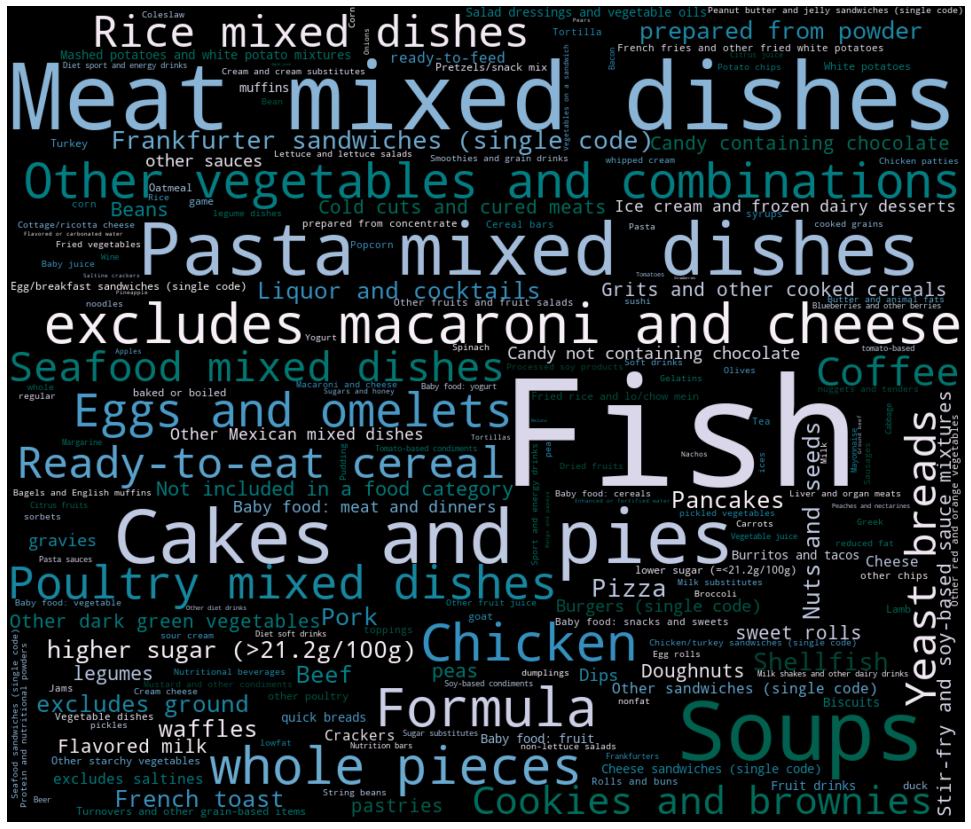

In [33]:
##for the column "WWEIA Category description" 
wordclouding(df2, label='WWEIA Category description', sep=',')

We can see a variety of food types in the column WWEIA Category description (What we Eat in America)

 We can get an overview of the food cateory just by looking at the visualisation

**Analysis**

Macro Nutrients: Macronutrients are a group of nutrients that provide your body with energy and the components it needs to maintain its structure and functions.They’re needed in relatively larger amounts than other nutrients, hence the term “macro.”

Micro Nutrients: Micronutrients are one of the major groups of nutrients your body needs. They include vitamins and minerals.


From the dataset, I am creating different dataframe containing only the macro nutrients and micro nutrients to examine them.


<Figure size 288x288 with 0 Axes>

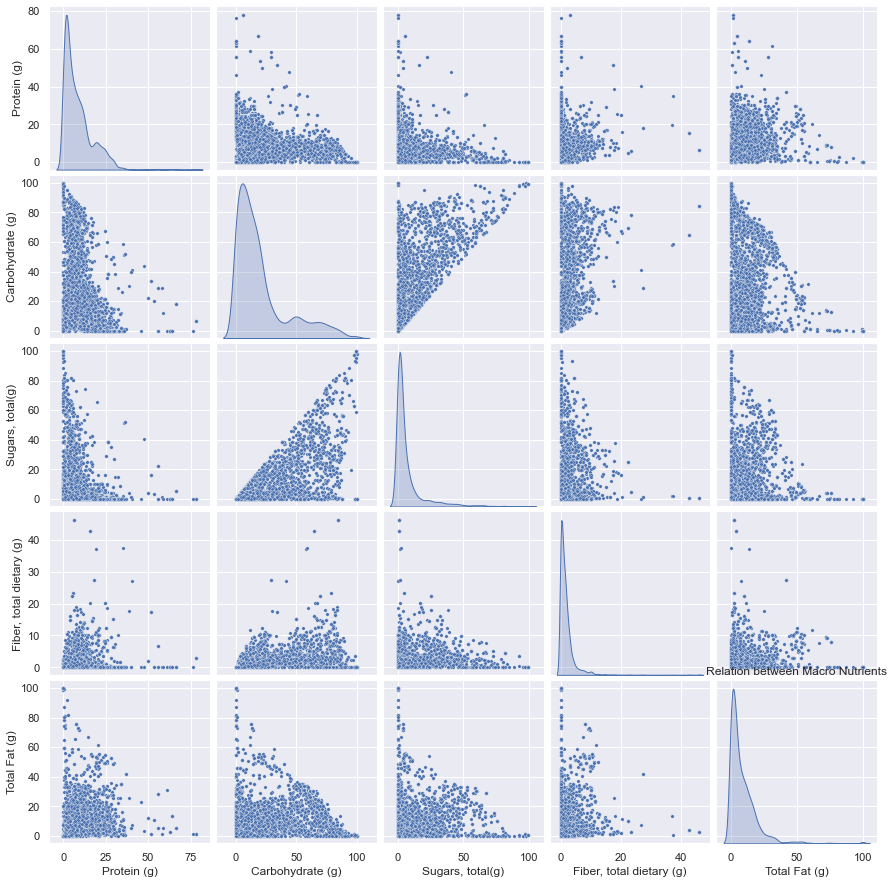

In [175]:
#But first, let's check the relation between Macronutrients Carbohydrates, Protein, Fats, Sugar and Fiber

plt.style.use('ggplot')
nb_sample=10000
#marker_size=nb_sample*5/10000
ds=df2.sample(10000, replace = True)
sns.set(font_scale=1)
plt.figure(figsize=(4, 4))

sns.pairplot(ds.loc[:,['Protein (g)',
       'Carbohydrate (g)', 'Sugars, total(g)', 'Fiber, total dietary (g)',
       'Total Fat (g)' ]], 
             diag_kind='kde',
             height=2.5,
             plot_kws = {'s': 12},
            )
plt.title("Relation between Macro Nutrients")

plt.show()

In [176]:
#dataframe for macro nutrients: 
df_macro = df2[['Main food description', 
       'WWEIA Category description', 'Energy (kcal)', 'Protein (g)',
       'Carbohydrate (g)','Fiber, total dietary (g)',
       'Total Fat (g)','Fatty acids, total saturated (g)',
       'Fatty acids, total monounsaturated (g)',
       'Fatty acids, total polyunsaturated (g)']]

#dataframe for micro nutrients:
df_micro = df2[['WWEIA Category description','Vitamin A, RAE (mcg_RAE)', 'Vitamin B-6 (mg)', 'Folic acid (mcg)',
      'Vitamin B-12 (mcg)', 'Vitamin B-12, added(mcg)',
       'Vitamin C (mg)', 'Vitamin D (D2 + D3) (mcg)',
       'Vitamin E (alpha-tocopherol) (mg)', 'Vitamin E, added(mg)',
       'Vitamin K (phylloquinone) (mcg)', 'Calcium (mg)', 'Phosphorus (mg)',
       'Magnesium (mg)', 'Iron(mg)', 'Zinc(mg)', 'Copper (mg)',
       'Selenium (mcg)', 'Potassium (mg)', 'Sodium (mg)', 'Caffeine (mg)',
       'Theobromine (mg)']]

In [177]:
def macro_micro_contents(category_name):
    '''
    This function groups the dataframe by WWEIA Category description column. 
    It then takes a category from WWEIA Category description column and gives a graph showing 
    the average number of macro and micro nutrients present in the category
    
    '''
    df_macro_groupby = df_macro.groupby("WWEIA Category description").agg("mean")
    df_macro_groupby.loc[category_name].plot(kind = 'barh', figsize = (8,6))
    plt.title("Average Macro Nutrients in "+ category_name, fontsize = 20)
    plt.xlim(0,300)
    plt.legend()
    
    plt.show()
    
    df_micro_grouped = df_micro.groupby("WWEIA Category description").agg("mean")
    df_micro_grouped.loc[category_name].plot(kind = 'barh', color = 'Green',figsize = (8,6))
    plt.title("Average Micro Nutrients in " + category_name , fontsize = 20)
    plt.xlim(0,1000)
    plt.legend()
    plt.show()
    

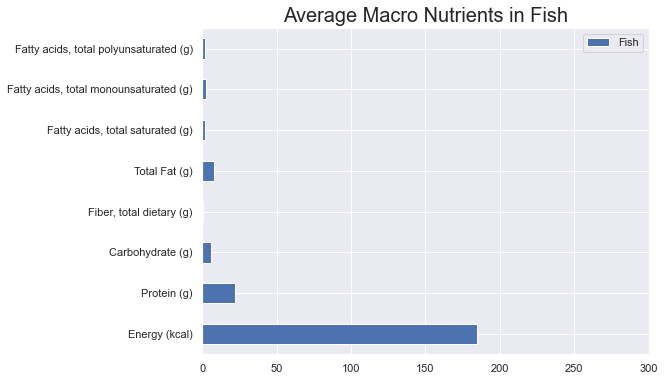

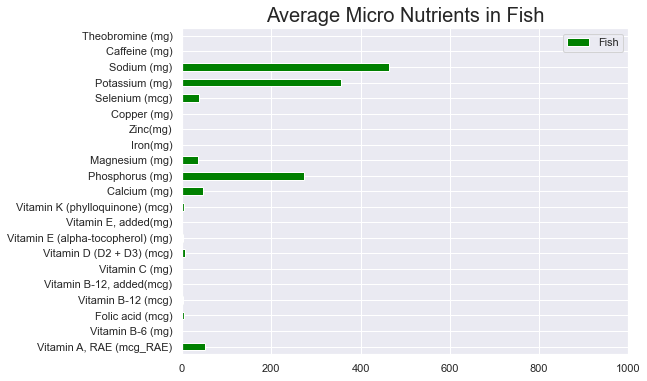

In [178]:
#Randomly taking "Fish" from WWEIA Category Description Column on the above function created
macro_micro_contents("Fish")

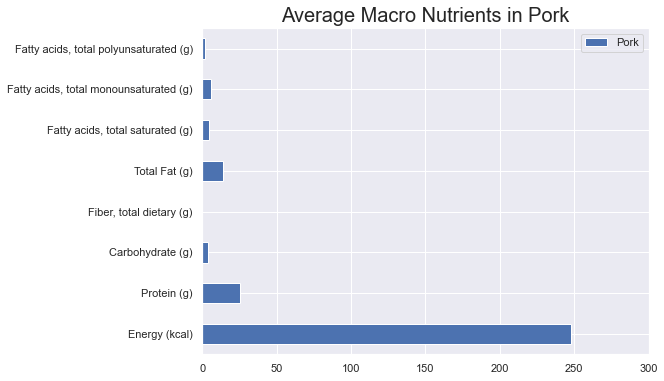

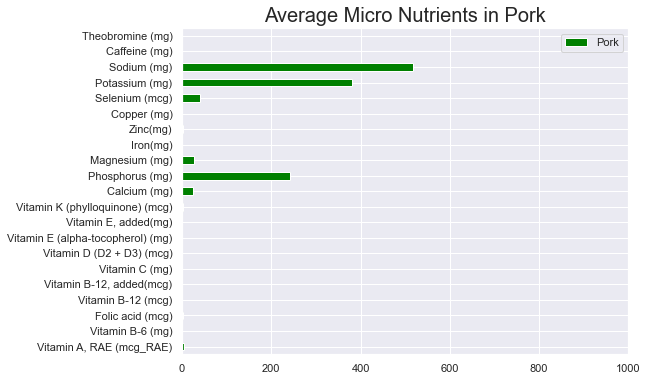

In [60]:
macro_micro_contents("Pork")

For different categories of food, we can get the information about the Macro nutrients and Micro nutrients. Like, average content of Protein in a particular category type. What is the contribution of Sodium in each category? What's the average amount of fat in a category Etc.

**Influence of Macro Nutrients on Energy**

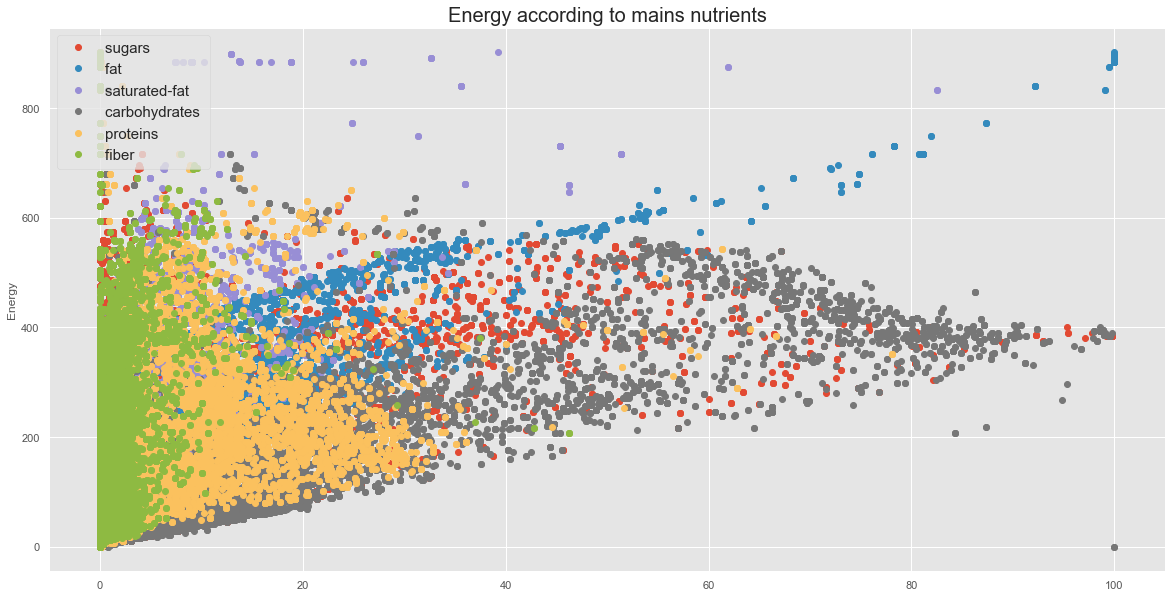

In [179]:
ds=df2.sample(15000, replace = True)
x = pd.DataFrame(ds['Energy (kcal)'], columns=['Energy (kcal)'])
fig=plt.figure(figsize=(20,10))
plt.style.use('ggplot')
plt.title('Energy according to mains nutrients', fontsize = 20 )

plt.plot(ds['Sugars, total(g)'], x, 'o', label='sugars ')
plt.plot(ds['Total Fat (g)'], x, 'o', label='fat ')
plt.plot(ds['Fatty acids, total saturated (g)'], x, 'o', label='saturated-fat ')
plt.plot(ds['Carbohydrate (g)'], x, 'o', label='carbohydrates ')
plt.plot(ds['Protein (g)'], x, 'o', label='proteins ')
plt.plot(ds['Fiber, total dietary (g)'], x, 'o', label='fiber ')
plt.ylabel('Energy')


plt.legend(loc='upper left', prop={'size':15})

plt.show()

It is evident from the graph,

- protein content rarely exceeds 40% of the total energy
- Fiber content has very less contribution in the total energy (not exceeding more then 20%)
- Most of the Energy is consituted from carbohydrates (including sugar and proteins)

**There’s no nutritional need or benefit that comes from eating  sugar.
The AHA suggests an added-sugar limit of no more than 100 calories per day (about 6 teaspoons or 24 grams of sugar) for most women and no more than 150 calories per day (about 9 teaspoons or 36 grams of sugar) for most men.[1]**

[1] https://www.hsph.harvard.edu/nutritionsource/carbohydrates/added-sugar-in-the-diet/


In [180]:
#Filtering the dataframe based on the daily consumption of sugar for men and women 
#to see what all food category lies under the filter

df_sugar = df2[['Main food description', 'WWEIA Category description', 'Energy (kcal)', 'Protein (g)',
       'Carbohydrate (g)', 'Sugars, total(g)', 'Fiber, total dietary (g)',
       'Total Fat (g)', 'Fatty acids, total saturated (g)']]

#filtering the dataframe for women 
sugar_women = df_sugar[df_sugar['Sugars, total(g)' ] <= 24]

#filtering the dataframe for men 
sugar_men = df_sugar[df_sugar['Sugars, total(g)' ] <= 36]

In [181]:
col = 'Sugars, total(g)'
max_= sugar_women.loc[sugar_women[col].idxmax()]
min_ = sugar_women.loc[sugar_women[col].idxmin()]
print("Food category containing maximum amount of sugar that is 24 for women:")
print('\n')
print(max_)

Food category containing maximum amount of sugar that is 24 for women:


Main food description                Frozen yogurt, soft serve, vanilla
WWEIA Category description          Ice cream and frozen dairy desserts
Energy (kcal)                                                     159.0
Protein (g)                                                         4.0
Carbohydrate (g)                                                   24.2
Sugars, total(g)                                                   24.0
Fiber, total dietary (g)                                            0.0
Total Fat (g)                                                       5.6
Fatty acids, total saturated (g)                                   3.42
Name: 85, dtype: object


Highest amount of Sugar content according to the daily consumption for women is Frozen yogurt. 
<br>

In [182]:
col = 'Sugars, total(g)'
max_= sugar_men.loc[sugar_men[col].idxmax()]
min_ = sugar_men.loc[sugar_men[col].idxmin()]
print("Food category containing maximum amount of sugar that is 30 for men:")
print('\n')
print(max_)

Food category containing maximum amount of sugar that is 30 for men:


Main food description               Cookie, vanilla with caramel, coconut, and cho...
WWEIA Category description                                       Cookies and brownies
Energy (kcal)                                                                   489.0
Protein (g)                                                                       3.5
Carbohydrate (g)                                                                 64.1
Sugars, total(g)                                                                 35.8
Fiber, total dietary (g)                                                          4.4
Total Fat (g)                                                                    25.8
Fatty acids, total saturated (g)                                                 17.7
Name: 3539, dtype: object


Highest amount of Sugar content according to the daily consumption for men is Cookie